# Neural Networks Examples
https://www.kaggle.com/learn/intro-to-deep-learning

## Single Neuron: Linear model

In [110]:
# Tensorflow library and keras from this library is used for building NNs
from tensorflow import keras
from tensorflow.keras import layers 

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [111]:
#Goal: create a linear model accepting three input features and producing a single output

# Sequential creates stack of layers
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3]) # unites=output unit, input_shape[number of feature cols]
])

/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Exercise
https://www.kaggle.com/code/hamidrahkooy/exercise-a-single-neuron/edit

In [112]:
import pandas as pd
car_df = pd.read_csv('final_car_data.csv')
car_df

,year,price,power_kw,mileage_in_km,brand
0,2011,9900,103.0,119000.0,2
1,2011,9290,118.0,184574.0,2
2,2011,9499,77.0,114860.0,2
3,2011,11990,103.0,205013.0,2
4,2011,10900,150.0,192350.0,2
...,...,...,...,...,...
120791,2023,28788,81.0,5.0,0
120792,2023,28420,81.0,4900.0,0
120793,2023,59990,110.0,10500.0,0
120794,2023,30370,152.0,10.0,0


In [113]:
input_shape=[4]

In [114]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=1, input_shape=[4])
])

/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [115]:
# checking weight and bias of the model
print(model.weights)
w,b = model.weights
print('weight = ', w)
print("and bias is ", b)

[<KerasVariable shape=(4, 1), dtype=float32, path=sequential_24/dense_41/kernel>, <KerasVariable shape=(1,), dtype=float32, path=sequential_24/dense_41/bias>]
weight =  <KerasVariable shape=(4, 1), dtype=float32, path=sequential_24/dense_41/kernel>
and bias is  <KerasVariable shape=(1,), dtype=float32, path=sequential_24/dense_41/bias>


## Note. Keras represents data/weights as tensors

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


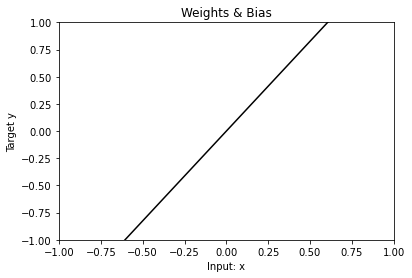

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


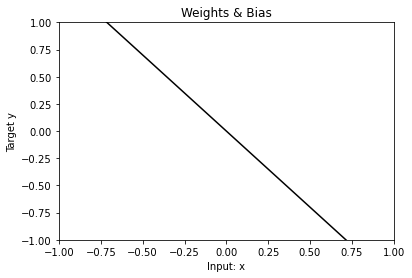

/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


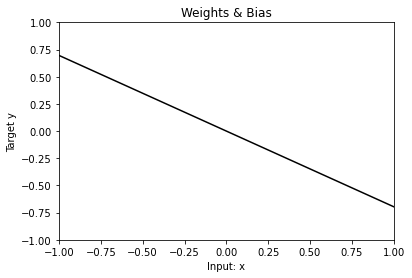

/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


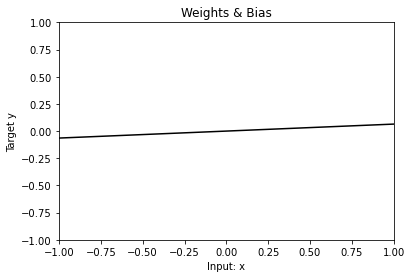

/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


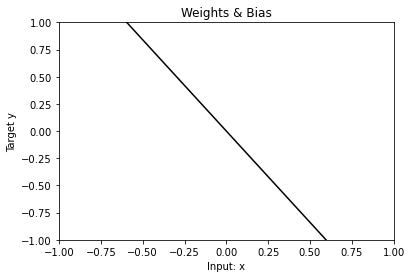

In [116]:
# Checking predicted values using the above model; 
# Note. weights are set randomly initially and change each time we run the model
import tensorflow as tf
import matplotlib.pyplot as plt

for i in [1,2,3,4,5]:
    toy_model = keras.Sequential([
        layers.Dense(units=1, input_shape=[1]),
    ])

    x = tf.linspace(-1.0,1.0,100)
    y = toy_model.predict(x)
    
    plt.figure()
    plt.plot(x,y,'k')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel('Input: x')
    plt.ylabel('Target y')
    w, b = toy_model.weights # same as model.get_weights()
    plt.title("Weights & Bias")
    plt.show()

## Stacking Layers: Nonlinear
Note. Layers can have many data types and can be used for many things.

In [117]:
# Rectifier function = max function 
# We use Rectified Linear Unit,(ReLU), i.e., max(0, wx+b),as the activation function
model = keras.Sequential([
    # hidden layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # output layer
    layers.Dense(units=1), # no activation function in the output layer, hence just linear function
])

/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [118]:
# Alternatively one can separate activation layers:
model = keras.Sequential([
    # hidden layers
    layers.Dense(units=4, input_shape=[2]),
    layers.Activation('relu'),
    layers.Dense(units=3),
    layers.Activation('relu'),
    # output layer
    layers.Dense(units=1), # no activation function in the output layer, hence just linear function
])

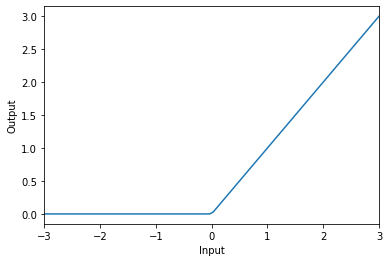

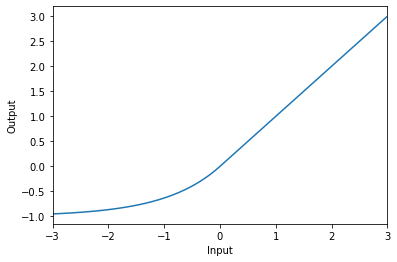

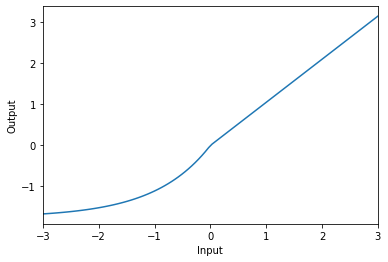

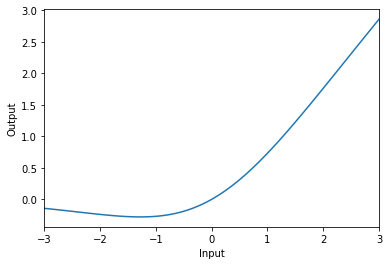

In [119]:
# Alternatives to relu: elu, selu, swish:
import tensorflow as tl

activation_list = ['relu', 'elu', 'selu', 'swish']
for act in activation_list:
    activation_layer = layers.Activation(act)
    x = tf.linspace(-3., 3., 100)
    y = activation_layer(x)
    plt.figure()
    plt.plot(x, y)
    plt.xlim(-3, 3)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.show()
    

## Training w Neural Network Model
Goal: train car dataset with a Neural network model

In [120]:
car_df

,year,price,power_kw,mileage_in_km,brand
0,2011,9900,103.0,119000.0,2
1,2011,9290,118.0,184574.0,2
2,2011,9499,77.0,114860.0,2
3,2011,11990,103.0,205013.0,2
4,2011,10900,150.0,192350.0,2
...,...,...,...,...,...
120791,2023,28788,81.0,5.0,0
120792,2023,28420,81.0,4900.0,0
120793,2023,59990,110.0,10500.0,0
120794,2023,30370,152.0,10.0,0


In [121]:
X = car_df.drop(columns='price') # training sample
y = car_df['price']
print(X.shape)
print(y.shape)

(120796, 4)
(120796,)


In [122]:
#building NN model: 3 layers, 1500 neurons
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape = [4]), # input shape = num of cols of X
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [123]:
# compile optimizer and loss function
model.compile(
    optimizer='adam', # Adam is a genral optimizer 
    loss = 'mae',
)

In [124]:
#training: fit the model
history = model.fit(
    X, y,
    batch_size=256,
    epochs=200
)

Epoch 1/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 12562.6104
Epoch 2/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6797.7666
Epoch 3/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6526.0151
Epoch 4/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6297.0854
Epoch 5/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 6242.5068
Epoch 6/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 6254.6494
Epoch 7/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6195.8013
Epoch 8/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6202.3711
Epoch 9/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6112.9971
Epoch 10/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6037.4634
Epoch 11/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6087.8652
Epoch 12/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 6016.1270
Epoch 13/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6060.8691
Epoch 14/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 6010.5342


<AxesSubplot:>

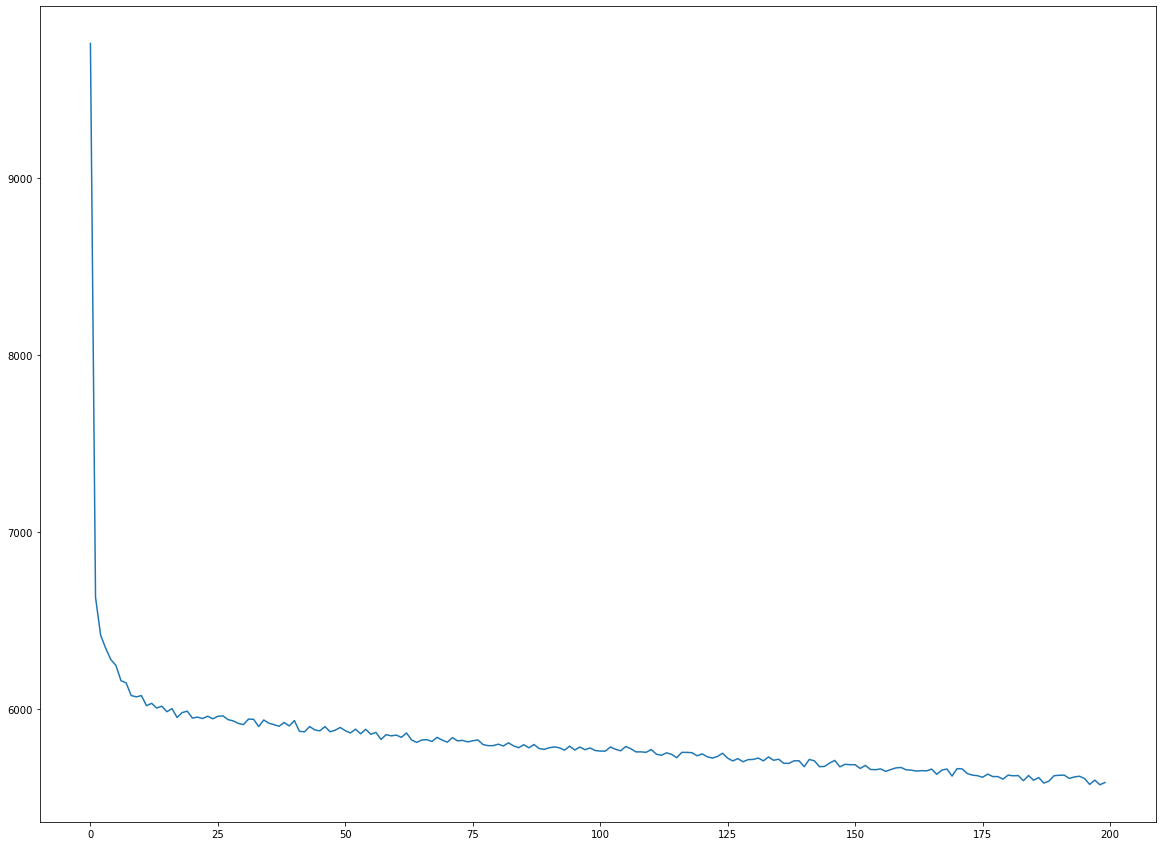

In [125]:
# convert history into a pands dataframe and plot the loss

history_df = pd.DataFrame(history.history)
history_df['loss'].plot(figsize=(20,15))

## Note. loss levels off as the epochs go by. 
When the loss curve becomes horizontal, it means the model has learned all it can and there would be no reason continue for additional epochs.

### Training w NN & Validation Test: Example 2.
We use "abalone", a biological dataset. The target feature is Rings: integer variable representing the age of the abalone (the number of rings on the shell). The goal of the dataset is to predict the age of the abalone (i.e., the number of rings) based on its physical characteristics. 

In [126]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('abalone.csv')

In [127]:
df = df.dropna()

In [128]:
print(df)

     Type  LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
0       M         0.455     0.365   0.095       0.5140         0.2245   
1       M         0.350     0.265   0.090       0.2255         0.0995   
2       F         0.530     0.420   0.135       0.6770         0.2565   
3       M         0.440     0.365   0.125       0.5160         0.2155   
4       I         0.330     0.255   0.080       0.2050         0.0895   
...   ...           ...       ...     ...          ...            ...   
4172    F         0.565     0.450   0.165       0.8870         0.3700   
4173    M         0.590     0.440   0.135       0.9660         0.4390   
4174    M         0.600     0.475   0.205       1.1760         0.5255   
4175    F         0.625     0.485   0.150       1.0945         0.5310   
4176    M         0.710     0.555   0.195       1.9485         0.9455   

      VisceraWeight  ShellWeight  Rings  
0            0.1010       0.1500     15  
1            0.0485       0.0700      7

In [129]:
# we drop the first column w non-numerical values
df = df.drop(columns='Type')
df

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [130]:
X = df.drop(columns='Rings')
y = df['Rings']
print(X)
print(y)

      LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
0            0.455     0.365   0.095       0.5140         0.2245   
1            0.350     0.265   0.090       0.2255         0.0995   
2            0.530     0.420   0.135       0.6770         0.2565   
3            0.440     0.365   0.125       0.5160         0.2155   
4            0.330     0.255   0.080       0.2050         0.0895   
...            ...       ...     ...          ...            ...   
4172         0.565     0.450   0.165       0.8870         0.3700   
4173         0.590     0.440   0.135       0.9660         0.4390   
4174         0.600     0.475   0.205       1.1760         0.5255   
4175         0.625     0.485   0.150       1.0945         0.5310   
4176         0.710     0.555   0.195       1.9485         0.9455   

      VisceraWeight  ShellWeight  
0            0.1010       0.1500  
1            0.0485       0.0700  
2            0.1415       0.2100  
3            0.1140       0.1550  
4       

In [131]:
# build the NN model 
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [132]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [133]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
history = model.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs = 256
)

Epoch 1/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.7732 - val_loss: 8.8823
Epoch 2/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3417 - val_loss: 6.0465
Epoch 3/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8062 - val_loss: 2.7031
Epoch 4/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7782 - val_loss: 2.2052
Epoch 5/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2079 - val_loss: 2.0503
Epoch 6/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0717 - val_loss: 1.9456
Epoch 7/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9596 - val_loss: 1.8694
Epoch 8/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8590 - val_loss: 1.8391
Epoch 9/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7482 - val_loss: 1.8520
Epoch 10/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8116 - val_loss: 1.8198
Epoch 11/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7790 - val_loss: 1.8094
Epoch 12/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8

<AxesSubplot:>

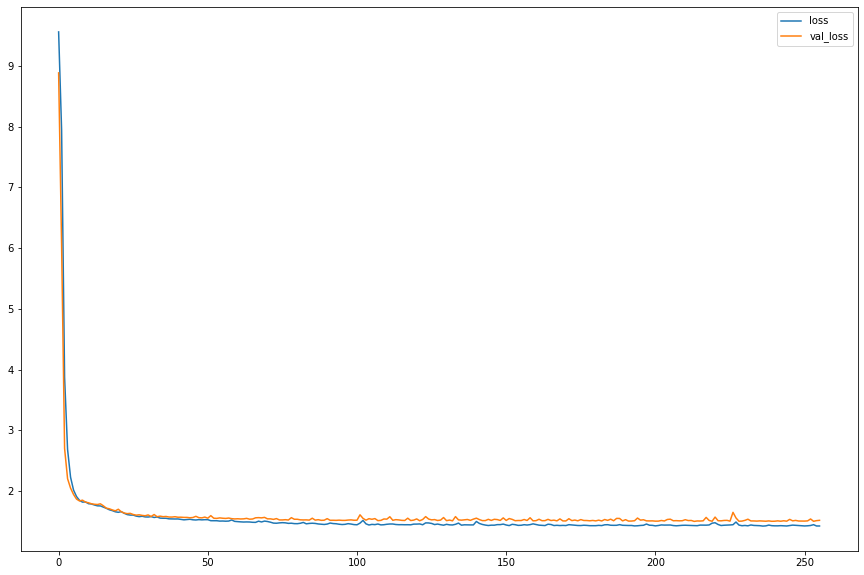

In [134]:
history_df = pd.DataFrame(history.history)
history_df.plot(figsize=(15,10))

## Overfitting/Underfitting
-Capacity of Model: complexity of samples it can learn

-Underfitting --> increase capacity: make NN wide by more units, or deeper by more layers.

-Early Stopping: use callback method

In [138]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # if no improvement on validation loss of min 0.001 stop
    patience=20, # num of epochs to wait before stopping
    restore_best_weights=True,
)

In [139]:
car_df

,year,price,power_kw,mileage_in_km,brand
0,2011,9900,103.0,119000.0,2
1,2011,9290,118.0,184574.0,2
2,2011,9499,77.0,114860.0,2
3,2011,11990,103.0,205013.0,2
4,2011,10900,150.0,192350.0,2
...,...,...,...,...,...
120791,2023,28788,81.0,5.0,0
120792,2023,28420,81.0,4900.0,0
120793,2023,59990,110.0,10500.0,0
120794,2023,30370,152.0,10.0,0


In [143]:
X = car_df.drop(columns='price')
y = car_df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y)

from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[4]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mae'
)

/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [145]:
history = model.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs=200,
    callbacks=[early_stopping],
    verbose=0 #turns off training log
)

min validation loss: 5620.78076171875


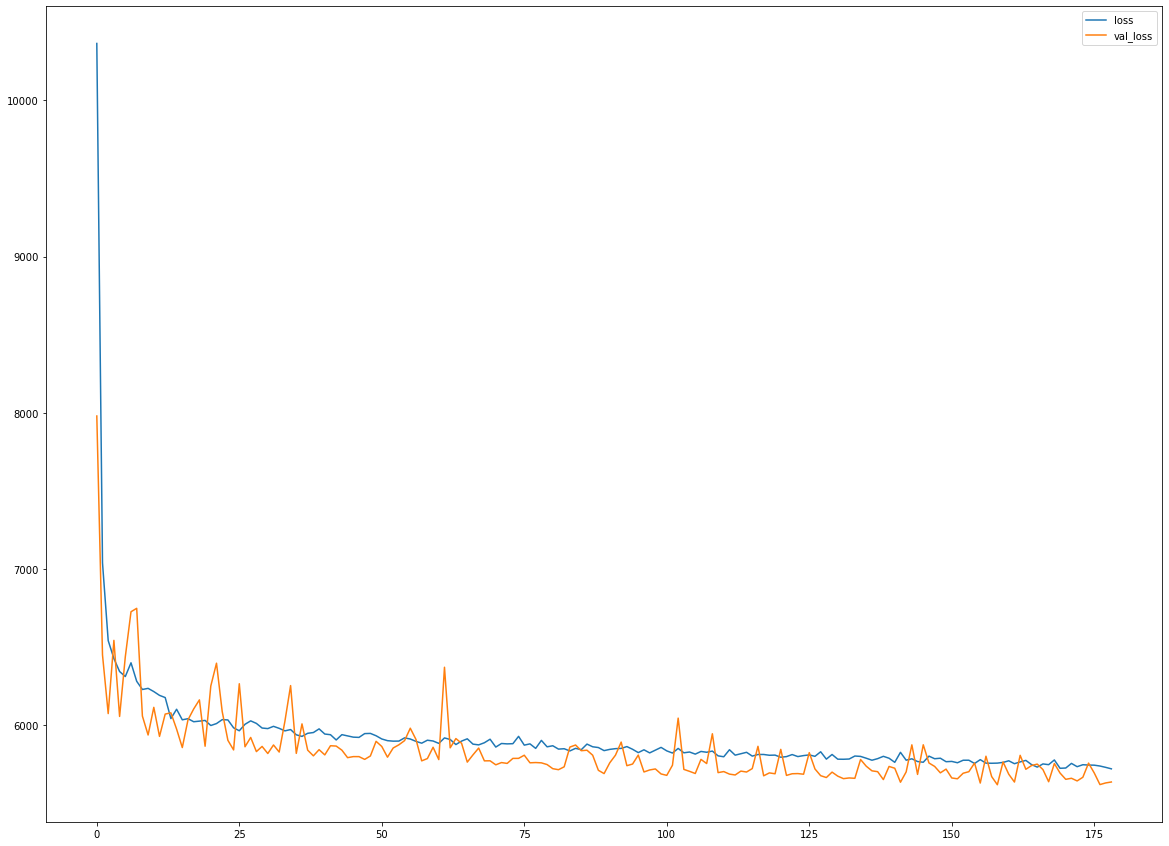

In [148]:
history_df = pd.DataFrame(history.history)
history_df.plot(figsize=(20,15))
print("min validation loss: {}".format(history_df['val_loss'].min()))

#### Note. Keras has stopped just after ~175 epochs, which is much earlier than 200

### Dropout and Normalisation

In [149]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Binary Classification

/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Validation Loss: -410678.2812
Best Validation Accuracy: 0.0000


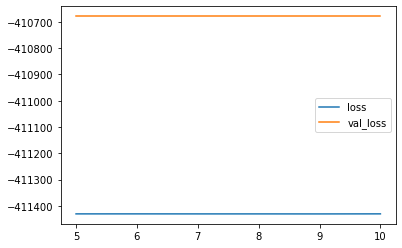

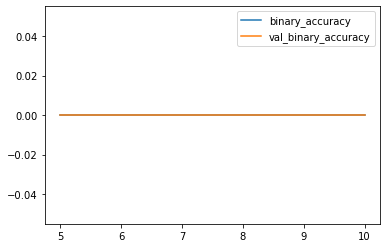

In [158]:
X = car_df.drop(columns='price')
y = car_df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y)

from tensorflow import keras
from tensorflow.keras import layers, callbacks

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[4]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))